In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl
import skfuzzy as fuzz

In [85]:
df = pd.read_csv("wifi_localization.txt",sep="\t", header=None)
df = abs(df)
data = df[[0,1,2,3,4,5,6]]
df

,0,1,2,3,4,5,6,7
0,64,56,61,66,71,82,81,1
1,68,57,61,65,71,85,85,1
2,63,60,60,67,76,85,84,1
3,61,60,68,62,77,90,80,1
4,63,65,60,63,77,81,87,1
...,...,...,...,...,...,...,...,...
1995,59,59,48,66,50,86,94,4
1996,59,56,50,62,47,87,90,4
1997,62,59,46,65,45,87,88,4
1998,62,58,52,61,41,90,85,4


In [86]:
df.describe()

,0,1,2,3,4,5,6,7
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,52.330500,55.623500,54.964000,53.566500,62.640500,80.985000,81.726500,2.500000
std,11.321677,3.417688,5.316186,11.471982,9.105093,6.516672,6.519812,1.118314
min,10.000000,45.000000,40.000000,11.000000,36.000000,61.000000,63.000000,1.000000
25%,46.000000,53.000000,51.000000,46.000000,56.000000,77.000000,78.000000,1.750000
50%,55.000000,56.000000,55.000000,56.000000,64.000000,82.000000,83.000000,2.500000
75%,61.000000,58.000000,58.000000,63.000000,69.000000,86.000000,87.000000,3.250000
max,74.000000,74.000000,73.000000,77.000000,89.000000,97.000000,98.000000,4.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x7fa6e3a6d5e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa6e3a89640>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa6e3a79d00>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa6e3a95160>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa6e3a95430>],
 'means': []}

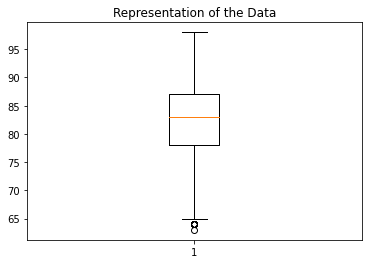

In [87]:
plt.yticks(range(0,100,5))
plt.title("Representation of the Data")
plt.boxplot(data[6])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa6e3a00310>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa6e39fd430>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa6e3a00a60>,
 'medians': [<matplotlib.lines.Line2D at 0x7fa6e39efee0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa6e3a073a0>,
 'means': []}

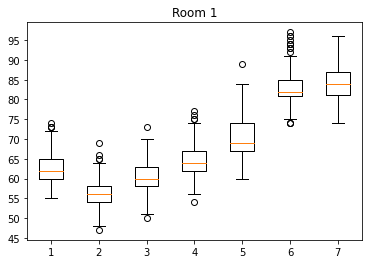

In [88]:
filt_room1 = (df[7]==1)
plt.yticks(range(0,100,5))
plt.title("Room 1")
plt.boxplot(data[filt_room1])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa6e38df730>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa6e38dfd00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa6e38df460>,
 'medians': [<matplotlib.lines.Line2D at 0x7fa6e38eb2e0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa6e38eb5b0>,
 'means': []}

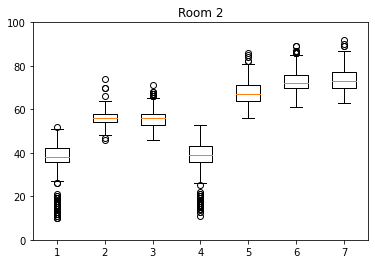

In [89]:
filt_room2 = (df[7]==2)
plt.ylim(0,100)
plt.title("Room 2")
plt.boxplot(data[filt_room2])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa6e38423a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa6e3842970>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa6e38420d0>,
 'medians': [<matplotlib.lines.Line2D at 0x7fa6e3842f10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa6e384d220>,
 'means': []}

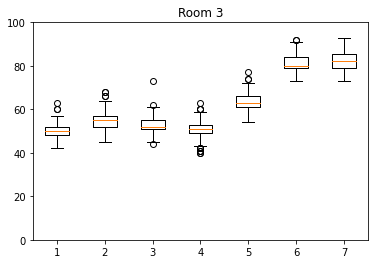

In [90]:
filt_room3 = (df[7]==3)
plt.ylim(0,100)
plt.title("Room 3")
plt.boxplot(data[filt_room3])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa6e378fdc0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa6e371f3a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa6e378faf0>,
 'medians': [<matplotlib.lines.Line2D at 0x7fa6e371f940>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa6e371fc40>,
 'means': []}

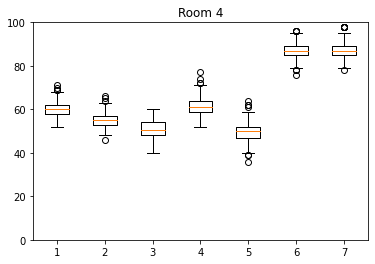

In [91]:
filt_room4 = (df[7]==4)
plt.ylim(0,100)
plt.title("Room 4")
plt.boxplot(data[filt_room4])

In [92]:
X = np.linspace(start=0, stop=100, num=100, endpoint=True, retstep=False)
#names_long = ['very_low', 'low', 'neutral', 'high', 'very high']
#names_short = ['low', 'neutral', 'high']

In [93]:
# Location 1

interval1 = [5, 5, 30]
interval2 = [25, int(((52-25)/2) + 25), 52]
interval3 = [48, int(((62-48)/2) + 45), 62]
interval4 = [58, int(((70-58)/2) + 58), 70]
interval5 = [68, 75, 75]

very_low_1 = fuzz.membership.trimf(X, interval1)
low_1 = fuzz.membership.trimf(X, interval2)
neutral_1 = fuzz.membership.trimf(X, interval3)
high_1 = fuzz.membership.trimf(X, interval4)
very_high_1 = fuzz.membership.trimf(X, interval5)

In [94]:
# Location 2

interval1 = [40, 40, 54]
interval2 = [50, int(((60-50)/2) + 50), 60]
interval3 = [58, 75, 75]

low_2 = fuzz.membership.trimf(X, interval2)
neutral_2 = fuzz.membership.trimf(X, interval3)
high_2 = fuzz.membership.trimf(X, interval4)

In [95]:
# Location 3

interval1 = [38, 38, 52]
interval2 = [50, int(((60-50)/2) + 50), 60]
interval3 = [58, 75, 75]

low_3 = fuzz.membership.trimf(X, interval2)
neutral_3 = fuzz.membership.trimf(X, interval3)
high_3 = fuzz.membership.trimf(X, interval4)

In [96]:
# Location 4

interval1 = [8, 8, 35]
interval2 = [30, int(((52-30)/2) + 30), 52]
interval3 = [50, int(((62-50)/2) + 50), 62]
interval4 = [60, int(((72-60)/2) + 60), 72]
interval5 = [68, 78, 78]

very_low_4 = fuzz.membership.trimf(X, interval1)
low_4 = fuzz.membership.trimf(X, interval2)
neutral_4 = fuzz.membership.trimf(X, interval3)
high_4 = fuzz.membership.trimf(X, interval4)
very_high_4 = fuzz.membership.trimf(X, interval5)

In [97]:
# Location 5

interval1 = [33, 33, 50]
interval2 = [46, int(((60-46)/2) + 46), 60]
interval3 = [58, int(((70-58)/2) + 58), 70]
interval4 = [68, int(((80-68)/2) + 68), 80]
interval5 = [75, 90, 90]

very_low_5 = fuzz.membership.trimf(X, interval1)
low_5 = fuzz.membership.trimf(X, interval2)
neutral_5 = fuzz.membership.trimf(X, interval3)
high_5 = fuzz.membership.trimf(X, interval4)
very_high_5 = fuzz.membership.trimf(X, interval5)

In [98]:
# Location 6

interval1 = [59, 59, 70]
interval2 = [66, int(((78-66)/2) + 66), 78]
interval3 = [76, int(((86-76)/2) + 76), 86]
interval4 = [84, int(((92-84)/2) + 84), 92]
interval5 = [90, 100, 100]

very_low_6 = fuzz.membership.trimf(X, interval1)
low_6 = fuzz.membership.trimf(X, interval2)
neutral_6 = fuzz.membership.trimf(X, interval3)
high_6 = fuzz.membership.trimf(X, interval4)
very_high_6 = fuzz.membership.trimf(X, interval5)

In [99]:
# Location 7

interval1 = [62, 62, 74]
interval2 = [70, int(((80-70)/2) + 70), 80]
interval3 = [78, int(((86-78)/2) + 78), 86]
interval4 = [84, int(((92-84)/2) + 84), 92]
interval5 = [90, 100, 100]

very_low_7 = fuzz.membership.trimf(X, interval1)
low_7 = fuzz.membership.trimf(X, interval2)
neutral_7 = fuzz.membership.trimf(X, interval3)
high_7 = fuzz.membership.trimf(X, interval4)
very_high_7 = fuzz.membership.trimf(X, interval5)

In [ ]:
#RULES#
rule1 = ctrl.Rule(loc1['average'], room['1'])
rule2 = ctrl.Rule(weight['low'] & age['high'], health['low'])
rule3 = ctrl.Rule(weight['high'], health['low'])
#problem_ctrl  = ctrl.ControlSystem([rule1, rule2, rule3,..])
problem = ctrl.ControlSystemSimulation(problem_ctrl)